# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [54]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

640

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [12]:
city = "butaritari"
weather_url = "http://api.openweathermap.org/data/2.5/weather?"
query_url = f"{weather_url}q={city}&appid={weather_api_key}"
weather_response = requests.get(query_url).json()
weather_response

{'coord': {'lon': 172.7902, 'lat': 3.0707},
 'weather': [{'id': 500,
   'main': 'Rain',
   'description': 'light rain',
   'icon': '10d'}],
 'base': 'stations',
 'main': {'temp': 300.18,
  'feels_like': 300.44,
  'temp_min': 300.18,
  'temp_max': 300.18,
  'pressure': 1008,
  'humidity': 83,
  'sea_level': 1008,
  'grnd_level': 1007},
 'visibility': 10000,
 'wind': {'speed': 7.84, 'deg': 74},
 'rain': {'1h': 0.18},
 'clouds': {'all': 74},
 'dt': 1611037686,
 'sys': {'country': 'KI', 'sunrise': 1610995216, 'sunset': 1611038294},
 'timezone': 43200,
 'id': 2110227,
 'name': 'Butaritari',
 'cod': 200}

In [11]:
weather_response['sys']['country']

'US'

In [22]:
weather_url = "http://api.openweathermap.org/data/2.5/weather?"

city_names = []
lats = []
longs = []
max_temp = []
humid = []
cloud = []
windspeed = []
country = []
date = []


i=0
set = 1
print("Beginning Data Retrieval")
print("---------------------------")


for city in cities:
    
    if i == 50:
        time.sleep(60)
        i=0
        set+=1
        
    
    query_url = f"{weather_url}q={city}&units=imperial&appid={weather_api_key}"
    weather_response = requests.get(query_url).json()
    i+=1
    print(f"Processing Record {i} of Set {set} | {city}")
    
    # Add city not found message to log output
    if weather_response['cod'] == '404':
        print(f"City not found. Skipping {city}...")
    else:
        city_names.append(city)
        lats.append(weather_response['coord']['lat'])
        longs.append(weather_response['coord']['lon'])
        max_temp.append(weather_response['main']['temp_max'])
        humid.append(weather_response['main']['humidity'])
        cloud.append(weather_response['clouds']['all'])
        windspeed.append(weather_response['wind']['speed'])
        country.append(weather_response['sys']['country'])
        date.append(weather_response['dt'])
    




Beginning Data Retrieval
---------------------------
Processing Record 1 of Set 1 | punta arenas
Processing Record 2 of Set 1 | klyuchi
Processing Record 3 of Set 1 | saint george
Processing Record 4 of Set 1 | grand centre
City not found. Skipping grand centre...
Processing Record 5 of Set 1 | bandarbeyla
Processing Record 6 of Set 1 | zhezkazgan
Processing Record 7 of Set 1 | atuona
Processing Record 8 of Set 1 | luoyang
Processing Record 9 of Set 1 | slave lake
Processing Record 10 of Set 1 | chibombo
Processing Record 11 of Set 1 | rikitea
Processing Record 12 of Set 1 | cabinda
Processing Record 13 of Set 1 | hermanus
Processing Record 14 of Set 1 | marienburg
Processing Record 15 of Set 1 | ust-kuyga
Processing Record 16 of Set 1 | yakshur-bodya
City not found. Skipping yakshur-bodya...
Processing Record 17 of Set 1 | quatre cocos
Processing Record 18 of Set 1 | lundazi
Processing Record 19 of Set 1 | los llanos de aridane
Processing Record 20 of Set 1 | busselton
Processing Reco

Processing Record 34 of Set 4 | umzimvubu
City not found. Skipping umzimvubu...
Processing Record 35 of Set 4 | doha
Processing Record 36 of Set 4 | pevek
Processing Record 37 of Set 4 | fort nelson
Processing Record 38 of Set 4 | bambous virieux
Processing Record 39 of Set 4 | yar-sale
Processing Record 40 of Set 4 | channel-port aux basques
Processing Record 41 of Set 4 | tabukiniberu
City not found. Skipping tabukiniberu...
Processing Record 42 of Set 4 | mahebourg
Processing Record 43 of Set 4 | severo-yeniseyskiy
Processing Record 44 of Set 4 | pangai
Processing Record 45 of Set 4 | inirida
Processing Record 46 of Set 4 | kargopol
Processing Record 47 of Set 4 | qaanaaq
Processing Record 48 of Set 4 | cherskiy
Processing Record 49 of Set 4 | pangnirtung
Processing Record 50 of Set 4 | sorland
Processing Record 1 of Set 5 | esperance
Processing Record 2 of Set 5 | mana
Processing Record 3 of Set 5 | porto walter
Processing Record 4 of Set 5 | calvinia
Processing Record 5 of Set 5 |

Processing Record 21 of Set 8 | bilma
Processing Record 22 of Set 8 | nova prata
Processing Record 23 of Set 8 | san cristobal
Processing Record 24 of Set 8 | yamada
Processing Record 25 of Set 8 | egvekinot
Processing Record 26 of Set 8 | ishigaki
Processing Record 27 of Set 8 | tsihombe
City not found. Skipping tsihombe...
Processing Record 28 of Set 8 | harper
Processing Record 29 of Set 8 | yen bai
Processing Record 30 of Set 8 | rawannawi
City not found. Skipping rawannawi...
Processing Record 31 of Set 8 | dourbali
Processing Record 32 of Set 8 | ciudad bolivar
Processing Record 33 of Set 8 | kavieng
Processing Record 34 of Set 8 | gorele
Processing Record 35 of Set 8 | makushino
Processing Record 36 of Set 8 | evensk
Processing Record 37 of Set 8 | kapoeta
Processing Record 38 of Set 8 | pishin
Processing Record 39 of Set 8 | shiozawa
Processing Record 40 of Set 8 | galgani
City not found. Skipping galgani...
Processing Record 41 of Set 8 | cayenne
Processing Record 42 of Set 8 

Processing Record 8 of Set 12 | chumikan
Processing Record 9 of Set 12 | santana do livramento
Processing Record 10 of Set 12 | isla vista
Processing Record 11 of Set 12 | teknaf
Processing Record 12 of Set 12 | banswada
Processing Record 13 of Set 12 | codrington
Processing Record 14 of Set 12 | seymchan
Processing Record 15 of Set 12 | kahului
Processing Record 16 of Set 12 | hare bay
Processing Record 17 of Set 12 | sandy bay
Processing Record 18 of Set 12 | strezhevoy
Processing Record 19 of Set 12 | hasaki
Processing Record 20 of Set 12 | yatou
Processing Record 21 of Set 12 | amiens
Processing Record 22 of Set 12 | sioux lookout
Processing Record 23 of Set 12 | mayo
Processing Record 24 of Set 12 | bukama
Processing Record 25 of Set 12 | tautira
Processing Record 26 of Set 12 | bilibino
Processing Record 27 of Set 12 | road town
Processing Record 28 of Set 12 | maldonado
Processing Record 29 of Set 12 | itoman
Processing Record 30 of Set 12 | fairbanks
Processing Record 31 of Set

In [23]:
len(city_names)


593

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [25]:
city_weather = pd.DataFrame({"City" : city_names,
                            "Lat" : lats,
                            "Lng" : longs,
                            "Max Temp" : max_temp,
                            "Humidity" : humid,
                            "Cloudiness" : cloud,
                            "Wind Speed" : windspeed,
                            "Country" : country,
                            "Date" : date})

city_weather.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,punta arenas,-53.1500,-70.9167,282.15,81,0,3.60,CL,1611037725
1,klyuchi,52.2667,79.1667,255.55,92,56,1.35,RU,1611037725
2,saint george,37.1041,-113.5841,278.15,36,1,2.06,US,1611037726
3,bandarbeyla,9.4942,50.8122,297.81,61,61,10.44,SO,1611037726
4,zhezkazgan,47.8043,67.7144,264.73,95,86,3.70,KZ,1611037726


In [26]:
city_weather.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000,5.930000e+02
mean,19.982585,22.152126,283.135902,72.745363,53.168634,3.804840,1.611038e+09
std,32.822625,89.018905,18.485912,20.073284,40.546502,2.746983,4.490810e+02
min,-54.800000,-179.166700,223.250000,8.000000,0.000000,0.100000,1.611037e+09
25%,-6.981100,-52.333300,271.150000,63.000000,4.000000,1.580000,1.611038e+09
50%,22.285500,25.619200,290.060000,78.000000,69.000000,3.090000,1.611039e+09
75%,47.866700,100.183300,297.660000,87.000000,92.000000,5.400000,1.611039e+09
max,78.218600,179.316700,312.150000,100.000000,100.000000,15.230000,1.611039e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [37]:
#  Get the indices of cities that have humidity over 100%.
city_weather.loc[city_weather["Humidity"]>100,].index

Int64Index([], dtype='int64')

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

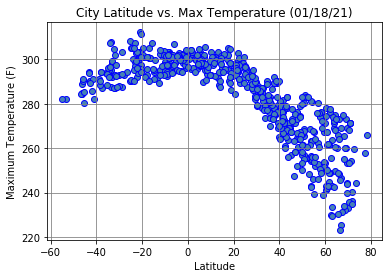

In [47]:
plt.scatter(city_weather["Lat"],city_weather["Max Temp"],c="steelblue",edgecolors="b")
plt.xlabel("Latitude")
plt.ylabel("Maximum Temperature (F)")
plt.title("City Latitude vs. Max Temperature (01/18/21)")
plt.grid(color="grey")
plt.show()

The plot is showing that as latitude increases, the maximum temperature decreases.

## Latitude vs. Humidity Plot

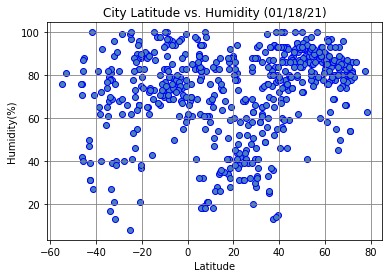

In [48]:
plt.scatter(city_weather["Lat"],city_weather["Humidity"],c="steelblue",edgecolors="b")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.title("City Latitude vs. Humidity (01/18/21)")
plt.grid(color="grey")
plt.show()

The plot suggests that humidity and city latitude have no correlation or association. The dots are all scattered across the plot without any uniformity or noticeable trends.

## Latitude vs. Cloudiness Plot

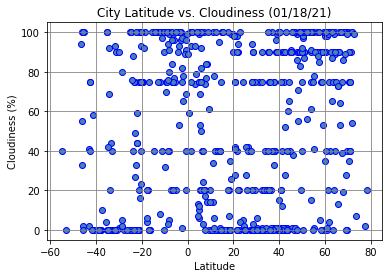

In [49]:
plt.scatter(city_weather["Lat"],city_weather["Cloudiness"],c="steelblue",edgecolors="b")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (01/18/21)")
plt.grid(color="grey")
plt.show()

This plot also suggests there isn't much of an association or correlation between latitude and cloudiness.

## Latitude vs. Wind Speed Plot

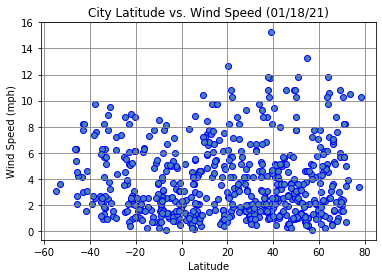

In [50]:
plt.scatter(city_weather["Lat"],city_weather["Wind Speed"],c="steelblue",edgecolors="b")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs. Wind Speed (01/18/21)")
plt.grid(color="grey")
plt.show()

There seems to be no assocation or noticeable trends between latitude and wind speed. However, all wind speeds stay below 20 mph.

## Linear Regression

In [66]:
north = city_weather.loc[city_weather["Lat"]>=0,]
south = city_weather.loc[city_weather["Lat"]<0,]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.8624975821901293


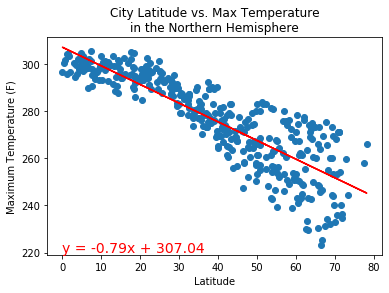

In [68]:
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(north["Lat"],north["Max Temp"])
regress_values = north["Lat"] * slope + intercept

corr= st.pearsonr(north["Lat"],north["Max Temp"])
print(f"The r-value is: {corr[0]}")

plt.scatter(north["Lat"],north["Max Temp"])
plt.xlabel("Latitude")
plt.ylabel("Maximum Temperature (F)")
plt.title("City Latitude vs. Max Temperature\nin the Northern Hemisphere")

plt.plot(north["Lat"],regress_values,"r-")
plt.annotate(f"y = {round(slope,2)}x + {round(intercept,2)}",(0,220),fontsize=14,color="red")
plt.show()

There is a strong inverse correlation between the latitude and maximum temperature for cities in the Northern Hemisphere.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.5491007917739348


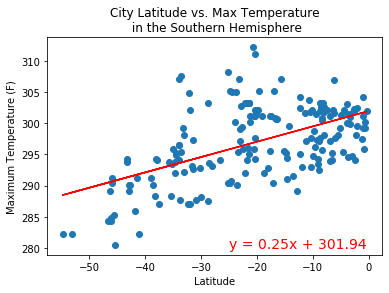

In [71]:
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(south["Lat"],south["Max Temp"])
regress_values = south["Lat"] * slope + intercept

corr= st.pearsonr(south["Lat"],south["Max Temp"])
print(f"The r-value is: {corr[0]}")

plt.scatter(south["Lat"],south["Max Temp"])
plt.xlabel("Latitude")
plt.ylabel("Maximum Temperature (F)")
plt.title("City Latitude vs. Max Temperature\n in the Southern Hemisphere")

plt.plot(south["Lat"],regress_values,"r-")
plt.annotate(f"y = {round(slope,2)}x + {round(intercept,2)}",(-25,280),fontsize=14,color="red")
plt.show()

There is a moderate correlation between latitude and maximum temperature for cities in the southern hemisphere.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.3644811330090349


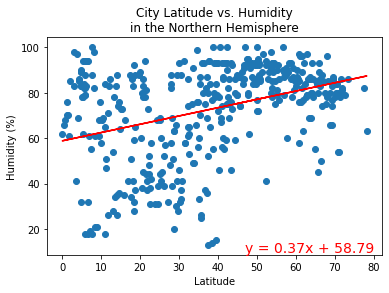

In [74]:
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(north["Lat"],north["Humidity"])
regress_values = north["Lat"] * slope + intercept

corr= st.pearsonr(north["Lat"],north["Humidity"])
print(f"The r-value is: {corr[0]}")

plt.scatter(north["Lat"],north["Humidity"])
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity\nin the Northern Hemisphere")

plt.plot(north["Lat"],regress_values,"r-")
plt.annotate(f"y = {round(slope,2)}x + {round(intercept,2)}",(47,10),fontsize=14,color="red")
plt.show()

There is a weak correlation between latitude and humidity for cities in the Northern Hemisphere.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.28415108668742606


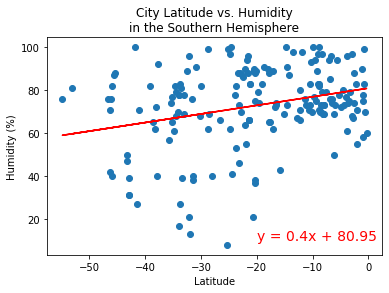

In [77]:
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(south["Lat"],south["Humidity"])
regress_values = south["Lat"] * slope + intercept

corr= st.pearsonr(south["Lat"],south["Humidity"])
print(f"The r-value is: {corr[0]}")

plt.scatter(south["Lat"],south["Humidity"])
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity\nin the Southern Hemisphere")

plt.plot(south["Lat"],regress_values,"r-")
plt.annotate(f"y = {round(slope,2)}x + {round(intercept,2)}",(-20,10),fontsize=14,color="red")
plt.show()

The correlation between latitude and humidity is weak at best for cities in the Southern Hemisphere.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.2374227873635255


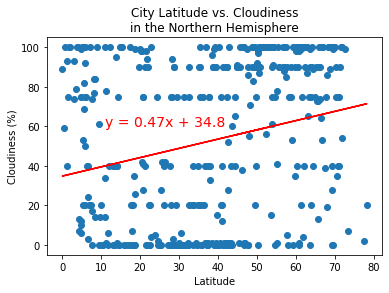

In [81]:
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(north["Lat"],north["Cloudiness"])
regress_values = north["Lat"] * slope + intercept

corr= st.pearsonr(north["Lat"],north["Cloudiness"])
print(f"The r-value is: {corr[0]}")

plt.scatter(north["Lat"],north["Cloudiness"])
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness\nin the Northern Hemisphere")

plt.plot(north["Lat"],regress_values,"r-")
plt.annotate(f"y = {round(slope,2)}x + {round(intercept,2)}",(11,60),fontsize=14,color="red")
plt.show()

The correlation between latitude and cloudiness is weak at best for cities in the Northern Hemisphere.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.42565677702687277


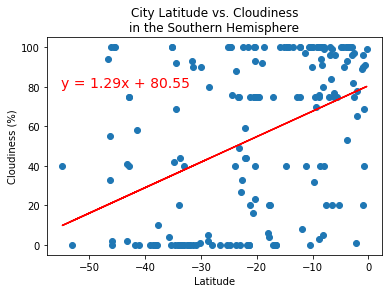

In [85]:
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(south["Lat"],south["Cloudiness"])
regress_values = south["Lat"] * slope + intercept

corr= st.pearsonr(south["Lat"],south["Cloudiness"])
print(f"The r-value is: {corr[0]}")

plt.scatter(south["Lat"],south["Cloudiness"])
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness\nin the Southern Hemisphere")

plt.plot(south["Lat"],regress_values,"r-")
plt.annotate(f"y = {round(slope,2)}x + {round(intercept,2)}",(-55,80),fontsize=14,color="red")
plt.show()

The correlation between latitude and cloudiness is moderate for cities in the Southern Hemisphere, and is stronger than that of the Northern Hemisphere.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.03690784899954401


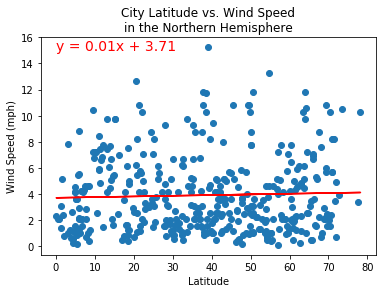

In [87]:
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(north["Lat"],north["Wind Speed"])
regress_values = north["Lat"] * slope + intercept

corr= st.pearsonr(north["Lat"],north["Wind Speed"])
print(f"The r-value is: {corr[0]}")

plt.scatter(north["Lat"],north["Wind Speed"])
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs. Wind Speed\nin the Northern Hemisphere")

plt.plot(north["Lat"],regress_values,"r-")
plt.annotate(f"y = {round(slope,2)}x + {round(intercept,2)}",(0,15),fontsize=14,color="red")
plt.show()

The linear regression shows that there is essentially no correlation or association between latitude and wind speed for cities in the Northern Hemisphere.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.2562404245739127


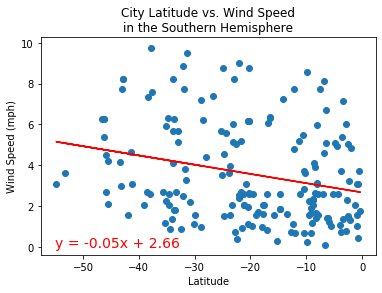

In [89]:
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(south["Lat"],south["Wind Speed"])
regress_values = south["Lat"] * slope + intercept

corr= st.pearsonr(south["Lat"],south["Wind Speed"])
print(f"The r-value is: {corr[0]}")

plt.scatter(south["Lat"],south["Wind Speed"])
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs. Wind Speed\nin the Southern Hemisphere")

plt.plot(south["Lat"],regress_values,"r-")
plt.annotate(f"y = {round(slope,2)}x + {round(intercept,2)}",(-55,0),fontsize=14,color="red")
plt.show()

There is a weak inverse correlation between the latitude and wind speed of cities in the Southern Hemisphere.